# Psychophysiology Processing


## Data collected using Acqknowldge and biopac MP150
## Data processed using Neurokit2 
### Data colelction and processing by Joel Larwood under the supervision of Dr Eric Vanman
### Collection sites
- Zygomaticus Major
- Corrugator Supercilli
- Electrodermal Activity

In [1]:
# Load NeuroKit and other useful packages
import neurokit2 as nk  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import bioread
import os

In [4]:
os.getcwd()

'/Users/joellarwood/Desktop/git/alexithymia_physiology_2019/data_cleaning'

In [2]:
# Test data on participant one 

data, sampling_rate = nk.read_acqknowledge("/Volumes/JoelLarwood/Music Affect psychophys2019/ACQ ParticipantData/001.acq") # reads in acknowledge file 


In [3]:
pd.DataFrame(data)

,Zygomaticus,Oculi,Corrugator,Skin conductance,Digital input,d9*2,d10*4,d11*8,d12*16,d8+d9*2,C4+d10*4,C5+d11*8,c6+d12*16,d13*32,c7+c8,d14*64,c9+c19,Zygo Integrated,Corr Integrated,ubermark
0,-5.065918,9.216309,3.417969,9.952393,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,0.101318,0.068359,1.0
1,-1.525879,9.155273,5.065918,9.953003,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,0.131836,0.169678,1.0
2,2.258301,8.361816,-3.662109,9.953003,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,0.177002,0.242920,1.0
3,-1.892090,3.601074,4.882812,9.954224,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,0.214844,0.340576,1.0
4,-5.615234,8.422852,-1.770020,9.953613,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,0.327148,0.375977,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800083,-2.319336,8.361816,6.530762,16.743774,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,2.177734,2.537842,1.0
1800084,-2.929688,11.413574,-1.464844,16.744385,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,2.155762,2.559814,1.0
1800085,-1.159668,2.929688,-0.305176,16.743774,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,2.166748,2.519531,1.0
1800086,-2.685547,7.507324,1.098633,16.746826,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,2.210693,2.501221,1.0


In [22]:
data_small = data.iloc[:,[0,2,3]]
pd.DataFrame(data_small)

,Zygomaticus,Corrugator,Skin conductance
0,-5.065918,3.417969,9.952393
1,-1.525879,5.065918,9.953003
2,2.258301,-3.662109,9.953003
3,-1.892090,4.882812,9.954224
4,-5.615234,-1.770020,9.953613
...,...,...,...
1800083,-2.319336,6.530762,16.743774
1800084,-2.929688,-1.464844,16.744385
1800085,-1.159668,-0.305176,16.743774
1800086,-2.685547,1.098633,16.746826


In [23]:
# Find the events

events = nk.events_find(data["ubermark"], threshold_keep = 'above')
events

{'onset': array([      0,  114166,  188394,  279167,  363178,  444084,  524487,
         595061,  669332,  738890,  811576,  878621,  952648, 1020522,
        1091455, 1160830, 1227162, 1295525, 1365775, 1435275, 1502581,
        1584028, 1655800, 1732305, 1799530]),
 'duration': array([45748, 30018, 30007, 30026, 30020, 30020, 30021, 30021, 30006,
        30004, 30012, 30020, 30016, 30007, 30022, 30021, 30006, 30023,
        30013, 30020, 30021, 30008, 30014, 30007,   558]),
 'label': array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
        '24', '25'], dtype='<U21')}

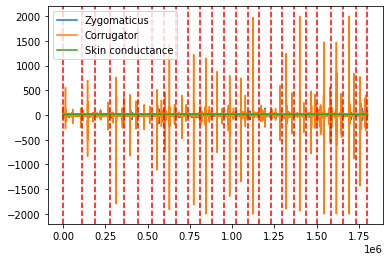

In [24]:
plot = nk.events_plot(events, data_small)

In [64]:
shrink = data.loc[20000:60000]
shrink

,Zygomaticus,Oculi,Corrugator,Skin conductance,Digital input,d9*2,d10*4,d11*8,d12*16,d8+d9*2,C4+d10*4,C5+d11*8,c6+d12*16,d13*32,c7+c8,d14*64,c9+c19,Zygo Integrated,Corr Integrated,ubermark
20000,-0.061035,4.638672,3.234863,14.190063,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,2.069092,1.699219,1.0
20001,-0.305176,6.652832,0.366211,14.191284,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,2.028809,1.636963,1.0
20002,-3.662109,6.225586,2.441406,14.189453,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,2.092285,1.661377,1.0
20003,-4.272461,6.958008,1.281738,14.191895,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,2.161865,1.682129,1.0
20004,-2.258301,7.263184,-0.427246,14.193115,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,5.0,2.161865,1.660156,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,-2.075195,4.455566,-1.098633,17.789917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.144775,3.238525,0.0
59997,-1.831055,9.399414,3.601074,17.791138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.156982,3.265381,0.0
59998,-0.061035,12.207031,-1.647949,17.789917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.095947,3.199463,0.0
59999,-1.647949,9.460449,5.249023,17.792358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.076416,3.278809,0.0


In [ ]:
df, info = nk.bio_process(eda = data["Skin conductance"], emg = data["Corrugator"])
df